In [1]:
# !pip list
# import splitfolders
# splitfolders.ratio('./newDogAndCat', output="./Output", seed=1, ratio=(0.8, 0.2))

# Data preperation

In [2]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms.transforms import RandomRotation
from torchvision.transforms.functional_pil import rotate
from torch.utils.data import ConcatDataset
# Augmentation = transforms.Compose([
#     transforms.Resize(size = (256, 256)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(45),
#     transforms.CenterCrop(10),
#     transforms.ColorJitter(brightness=.5, hue=.3),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.ToTensor()
# ])

Augmentation_Flip = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

Augmentation_Rotae = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

Augmentation_Crop = transforms.Compose([
    transforms.CenterCrop(100),
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Augmentation_Color = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.ToTensor()
])

Augmentation_Blur = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor()
])

Resize_Only = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Flip_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Flip)

Rotae_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Rotae)

Crop_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Crop)

Color_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Color)

Blur_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Blur)

Train_Dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Resize_Only)

Concat_Flip = ConcatDataset([Train_Dataset, Flip_dataset])
Concat_Rotae = ConcatDataset([Train_Dataset, Rotae_dataset])
Concat_Crop = ConcatDataset([Train_Dataset, Crop_dataset])
Concat_Color = ConcatDataset([Train_Dataset, Color_dataset])
Concat_Blur = ConcatDataset([Train_Dataset, Blur_dataset])

Test_Dataset = datasets.ImageFolder(
    root="./Output/val", 
    transform = Resize_Only)

In [3]:
print(len(Train_Dataset))
print(len(Test_Dataset))

3840
960


In [4]:
import torch
import torch.nn as nn
# set seed
torch.manual_seed(1)
# Load Augmentated Train Data into a DataLoader
Flip_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Flip,
  batch_size = 8,
  shuffle = True,
  )

Rotate_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Rotae,
  batch_size = 8,
  shuffle = True,
  )

Crop_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Crop,
  batch_size = 8,
  shuffle = True,
  )

Color_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Color,
  batch_size = 8,
  shuffle = True,
  )

Blur_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Blur,
  batch_size = 8,
  shuffle = True,
  )

# Load Orignal Train Data into a DataLoader
Orignal_Train_Loader = torch.utils.data.DataLoader(
  dataset = Train_Dataset, 
  batch_size = 8,  
  shuffle = True  
)

# Load Test Data into a DataLoader
Animal_test_loader = torch.utils.data.DataLoader(
  dataset = Test_Dataset, 
  batch_size = 8,  # Make sure this matches with the training dimension
  shuffle = False  # Avoid shuffling.
)

In [5]:
# Check the batch dimensions established with the loader.
for images, labels in Flip_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Rotate_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Crop_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Color_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Blur_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break


for images, labels in Orignal_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Animal_test_loader:  
  print(f'Test Image Batch Shape: {images.shape}')
  print(f'Test Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Test Image Batch Shape: torch.Size([8, 3, 256, 256])
Test Image Label Shape: torch.Size([8])


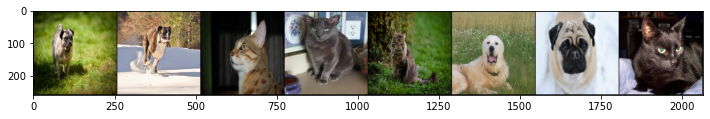

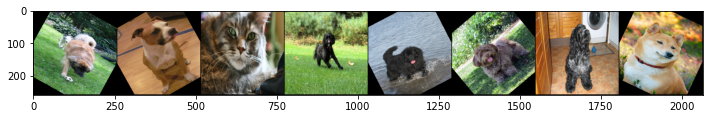

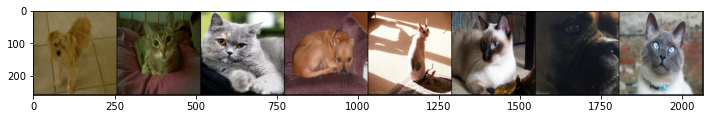

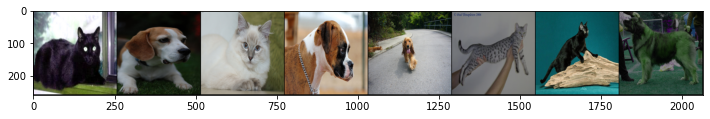

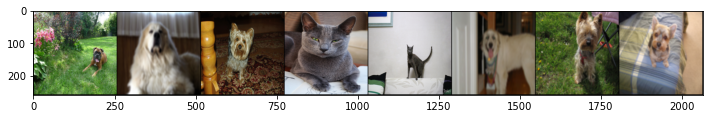

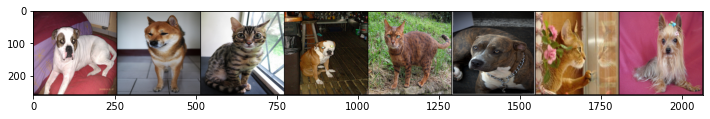

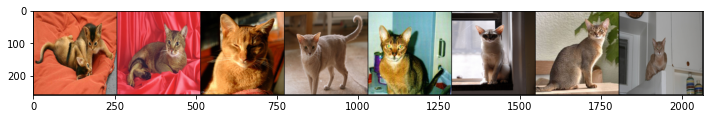

In [6]:
# Construct a graph showing the data transformations
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

def display_pic(x):
    for images, labels in x:
        fig,ax = plt.subplots(figsize = (12,12))
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break

display_pic(Flip_Train_Loader)
display_pic(Rotate_Train_Loader)
display_pic(Crop_Train_Loader)
display_pic(Color_Train_Loader)
display_pic(Blur_Train_Loader)
display_pic(Orignal_Train_Loader)
display_pic(Animal_test_loader)

# Model 1

In [7]:
import torch.nn.functional as F 
import torch.optim as optim

class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = L1(nn.Conv2d(3, 16, 3), weight_decay = 0.001)
        # we use the maxpool multiple times, but define it once
        self.pool = nn.MaxPool2d(2,2)
        # in_channels = 6 because self.conv1 output 6 channel
        self.conv2 = nn.Conv2d(16, 32, 2) 
        # 5*5 comes from the dimension of the last convnet layer
        self.norm = nn.BatchNorm2d(16)
        self.dropout1 = nn.Dropout2d(0.2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*63*63, 1024) 
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x): 
        x = F.relu(self.conv1(x))
        x = self.norm(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 32*63*63)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)  # no activation on final layer 
        return x

class L1(torch.nn.Module):
    def __init__(self, module, weight_decay):
        super().__init__()
        self.module = module
        self.weight_decay = weight_decay

        # Backward hook is registered on the specified module
        self.hook = self.module.register_full_backward_hook(self._weight_decay_hook)

    # Not dependent on backprop incoming values, placeholder
    def _weight_decay_hook(self, *_):
        for param in self.module.parameters():
            # If there is no gradient or it was zeroed out
            # Zeroed out using optimizer.zero_grad() usually
            # Turn on if needed with grad accumulation/more safer way
            # if param.grad is None or torch.all(param.grad == 0.0):

            # Apply regularization on it
            param.grad = self.regularize(param)

    def regularize(self, parameter):
        # L1 regularization formula
        return self.weight_decay * torch.sign(parameter.data)

    def forward(self, *args, **kwargs):
        # Simply forward and args and kwargs to module
        return self.module(*args, **kwargs)

## Flip

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Flip = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Flip.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.013)

0 10 0.7881527274847031
0 20 0.6543886005878449
0 30 0.7683543503284455
0 40 0.7019236266613007
0 50 0.6939128518104554
0 60 0.6928497850894928
0 70 0.6914786338806153
0 80 0.6960634887218475
0 90 0.693378746509552
0 100 0.6875384271144866
0 110 0.6735342144966125
0 120 0.7006338655948638
0 130 0.6915159165859223
0 140 0.700307834148407
0 150 0.7041682302951813
0 160 0.7018430590629577
0 170 0.6941310226917267
0 180 0.6876463115215301
0 190 0.680382353067398
0 200 0.7041863918304443
0 210 0.6906286001205444
0 220 0.6799630284309387
0 230 0.6649513065814971
0 240 0.7107509076595306
0 250 0.6938712239265442
0 260 0.6820230424404145
0 270 0.6751394271850586
0 280 0.6882306337356567
0 290 0.6811467289924622
0 300 0.6650204420089721
0 310 0.7169716238975525
0 320 0.6932607233524323
0 330 0.6878715276718139
0 340 0.6990281820297242
0 350 0.6849299371242523
0 360 0.688750684261322
0 370 0.6883850455284118
0 380 0.6904350757598877
0 390 0.6906294822692871
0 400 0.6882041811943054
0 410 0.66706

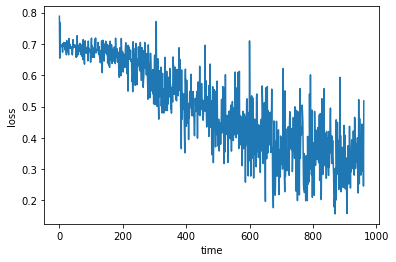

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net_Flip' + str(epoch) + '.pth'
    torch.save(Net_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

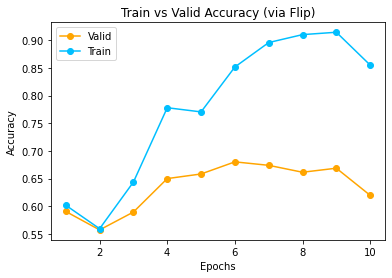

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m1 = test_accu
train_accu_flip_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

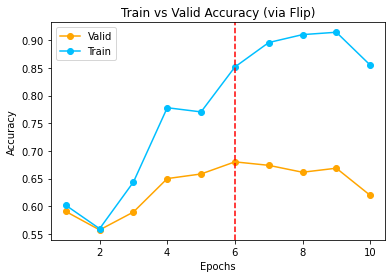

In [11]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m1.index(max(test_accu_flip_m1))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_flip_m1}')
print(f'Test accuracy iteration: {test_accu_flip_m1}')

Train accuracy iteration: [0.6018229166666667, 0.5595052083333333, 0.64375, 0.7779947916666666, 0.7704427083333333, 0.8515625, 0.895703125, 0.9100260416666667, 0.9143229166666667, 0.855078125]
Test accuracy iteration: [0.590625, 0.5572916666666666, 0.5895833333333333, 0.65, 0.6583333333333333, 0.6802083333333333, 0.6739583333333333, 0.6614583333333334, 0.66875, 0.6197916666666666]


## Rotate

In [13]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Rotate = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 0.8960159003734589
0 20 0.6966158241033554
0 30 0.7177128434181214
0 40 0.7031389236450195
0 50 0.6964470088481903
0 60 0.6677313685417176
0 70 0.6948897480964661
0 80 0.716652375459671
0 90 0.6902290105819702
0 100 0.6878918051719666
0 110 0.6551052033901215
0 120 0.7086106717586518
0 130 0.7003972232341766
0 140 0.693152904510498
0 150 0.6846475780010224
0 160 0.7120769381523132
0 170 0.6795498788356781
0 180 0.6951741933822632
0 190 0.6681747496128082
0 200 0.7075333952903747
0 210 0.6894095599651336
0 220 0.6450202345848084
0 230 0.7028215587139129
0 240 0.6924982249736786
0 250 0.6970196545124054
0 260 0.6997711777687072
0 270 0.7342699825763702
0 280 0.6972482621669769
0 290 0.6959134399890899
0 300 0.6898178219795227
0 310 0.6960846781730652
0 320 0.6940014719963074
0 330 0.6899522542953491
0 340 0.6926727771759034
0 350 0.686675626039505
0 360 0.7012562572956085
0 370 0.6831354975700379
0 380 0.683096033334732
0 390 0.675554233789444
0 400 0.6506552308797836
0 410 0.724571

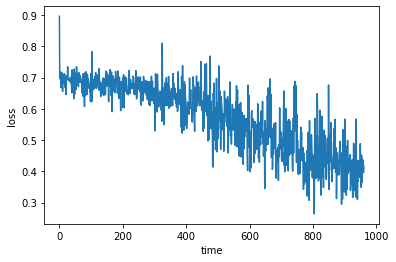

In [14]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net_Rotate' + str(epoch) + '.pth'
    torch.save(Net_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

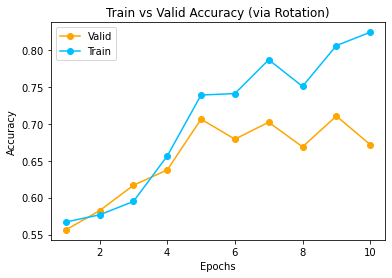

In [15]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m1 = test_accu
train_accu_rotate_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

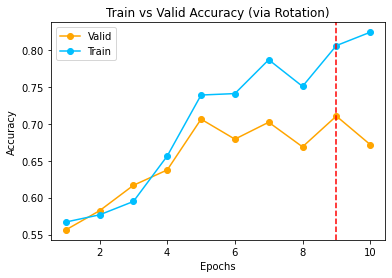

In [16]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m1.index(max(test_accu_rotate_m1))+1, color='r', linestyle='--')
plt.show()

In [17]:
print(f'Train accuracy iteration: {train_accu_rotate_m1}')
print(f'Test accuracy iteration: {test_accu_rotate_m1}')

Train accuracy iteration: [0.5669270833333333, 0.5766927083333333, 0.5947916666666667, 0.6563802083333333, 0.7389322916666666, 0.7408854166666666, 0.78671875, 0.7506510416666666, 0.805859375, 0.8239583333333333]
Test accuracy iteration: [0.55625, 0.5822916666666667, 0.6166666666666667, 0.6375, 0.70625, 0.6791666666666667, 0.7020833333333333, 0.66875, 0.7104166666666667, 0.671875]


## Crop

In [18]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Crop = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 0.7876588046550751
0 20 0.7288564741611481
0 30 0.708177649974823
0 40 0.7012247681617737
0 50 0.6935140252113342
0 60 0.6852171540260314
0 70 0.6890222370624542
0 80 0.7173194468021393
0 90 0.6903353869915009
0 100 0.6924886226654052
0 110 0.6978478133678436
0 120 0.6903236210346222
0 130 0.6777922809123993
0 140 0.7001322567462921
0 150 0.7129158496856689
0 160 0.7069808125495911
0 170 0.696405577659607
0 180 0.6891562104225158
0 190 0.6828688323497772
0 200 0.7028825640678406
0 210 0.6928555250167847
0 220 0.6880623996257782
0 230 0.6860795259475708
0 240 0.7066628575325012
0 250 0.6879953801631927
0 260 0.6915570139884949
0 270 0.6872564136981965
0 280 0.6901755630970001
0 290 0.6626287400722504
0 300 0.6936488091945648
0 310 0.6817212700843811
0 320 0.6984519720077514
0 330 0.6906792938709259
0 340 0.7086961388587951
0 350 0.6904152631759644
0 360 0.7003723621368408
0 370 0.6962245225906372
0 380 0.6890268206596375
0 390 0.6894116759300232
0 400 0.6934775173664093
0 410 0.692

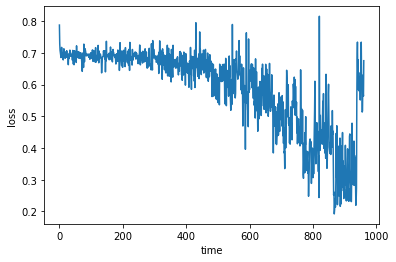

In [19]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net_Crop' + str(epoch) + '.pth'
    torch.save(Net_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

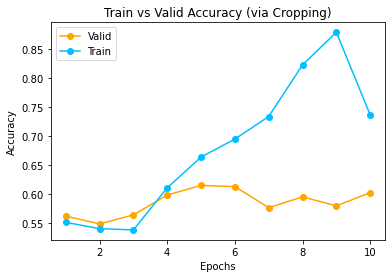

In [20]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m1 = test_accu
train_accu_crop_m1= train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

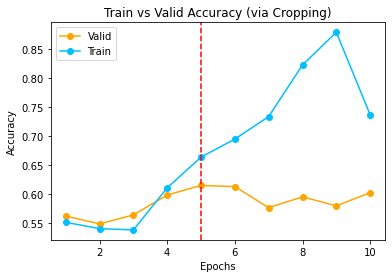

In [21]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m1.index(max(test_accu_crop_m1))+1, color='r', linestyle='--')
plt.show()

In [22]:
print(f'Train accuracy iteration: {train_accu_crop_m1}')
print(f'Test accuracy iteration: {test_accu_crop_m1}')

Train accuracy iteration: [0.5506510416666667, 0.5397135416666666, 0.5375, 0.6104166666666667, 0.663671875, 0.6947916666666667, 0.7338541666666667, 0.8231770833333333, 0.8798177083333333, 0.7368489583333333]
Test accuracy iteration: [0.5614583333333333, 0.5479166666666667, 0.5635416666666667, 0.5979166666666667, 0.6145833333333334, 0.6125, 0.5760416666666667, 0.5947916666666667, 0.5791666666666667, 0.6020833333333333]


## Color

In [23]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Color = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Color.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.018)

0 10 0.8112300872802735
0 20 0.684210729598999
0 30 0.7191187977790833
0 40 0.7306396007537842
0 50 0.6891105890274047
0 60 0.6872517108917237
0 70 0.698825615644455
0 80 0.700885659456253
0 90 0.6916902840137482
0 100 0.6904233396053314
0 110 0.6814613461494445
0 120 0.702074158191681
0 130 0.6854232013225555
0 140 0.7052305340766907
0 150 0.697100567817688
0 160 0.7060176789760589
0 170 0.6924310088157654
0 180 0.6908101737499237
0 190 0.6847450613975525
0 200 0.7014236807823181
0 210 0.6896772682666779
0 220 0.693171501159668
0 230 0.6901992082595825
0 240 0.7008987724781036
0 250 0.6964737296104431
0 260 0.6942154109477997
0 270 0.6923001348972321
0 280 0.687894856929779
0 290 0.6874041795730591
0 300 0.6735142230987549
0 310 0.6946895718574524
0 320 0.7036573886871338
0 330 0.6907332599163055
0 340 0.7017644047737122
0 350 0.6889253079891204
0 360 0.6982965350151062
0 370 0.6903305649757385
0 380 0.6918177783489228
0 390 0.6884396553039551
0 400 0.6890874385833741
0 410 0.69710153

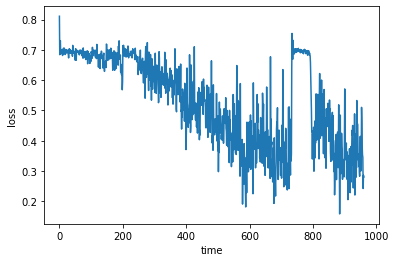

In [24]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net_Color' + str(epoch) + '.pth'
    torch.save(Net_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

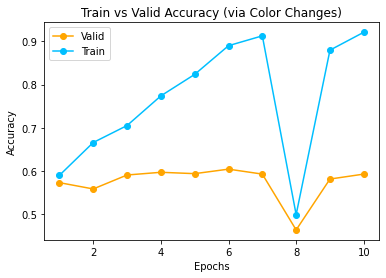

In [25]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m1 = test_accu
train_accu_color_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

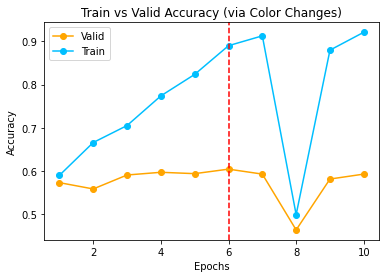

In [26]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m1.index(max(test_accu_color_m1))+1, color='r', linestyle='--')
plt.show()

In [27]:
print(f'Train accuracy iteration: {train_accu_color_m1}')
print(f'Test accuracy iteration: {test_accu_color_m1}')

Train accuracy iteration: [0.58984375, 0.6657552083333333, 0.705078125, 0.7736979166666667, 0.8234375, 0.88984375, 0.9126302083333333, 0.49895833333333334, 0.8795572916666666, 0.9209635416666667]
Test accuracy iteration: [0.5729166666666666, 0.5583333333333333, 0.590625, 0.596875, 0.59375, 0.6041666666666666, 0.5927083333333333, 0.4635416666666667, 0.58125, 0.5927083333333333]


## Blur

In [28]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Blur = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Blur.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.01)

0 10 0.8245269685983658
0 20 0.653887665271759
0 30 0.7427333950996399
0 40 0.7316131949424743
0 50 0.6868432819843292
0 60 0.6940778732299805
0 70 0.6818959236145019
0 80 0.710618770122528
0 90 0.6938803136348725
0 100 0.6898424983024597
0 110 0.6826175212860107
0 120 0.6963408708572387
0 130 0.685571140050888
0 140 0.7001091003417969
0 150 0.7053341329097748
0 160 0.69600048661232
0 170 0.6953137159347534
0 180 0.6864327430725098
0 190 0.6735631644725799
0 200 0.7001227796077728
0 210 0.6930377721786499
0 220 0.6752166032791138
0 230 0.6867719411849975
0 240 0.7081729590892791
0 250 0.6954217553138733
0 260 0.6774199426174163
0 270 0.7205115675926208
0 280 0.6861035704612732
0 290 0.690945965051651
0 300 0.6808876514434814
0 310 0.6910338640213013
0 320 0.6935944616794586
0 330 0.6843198955059051
0 340 0.6814404189586639
0 350 0.706003475189209
0 360 0.6900614857673645
0 370 0.6879127740859985
0 380 0.6960557639598847
0 390 0.6864345610141754
0 400 0.6813067078590394
0 410 0.67403382

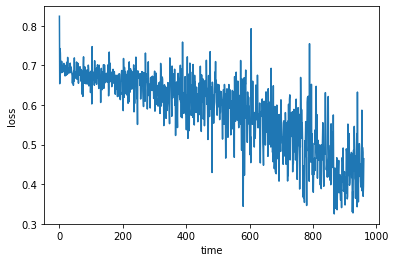

In [29]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net_Blur' + str(epoch) + '.pth'
    torch.save(Net_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)

# plotting                  
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

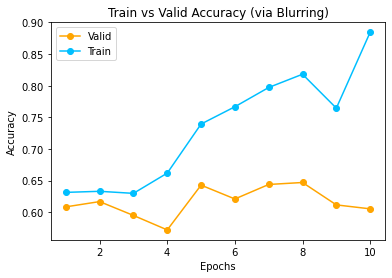

In [30]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m1 = test_accu
train_accu_blur_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

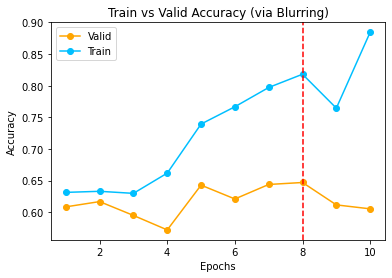

In [31]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m1.index(max(test_accu_blur_m1))+1, color='r', linestyle='--')
plt.show()

In [32]:
print(f'Train accuracy iteration: {train_accu_blur_m1}')
print(f'Test accuracy iteration: {test_accu_blur_m1}')

Train accuracy iteration: [0.63125, 0.6329427083333333, 0.6296875, 0.66171875, 0.7393229166666667, 0.7666666666666667, 0.7971354166666667, 0.8180989583333333, 0.764453125, 0.8845052083333333]
Test accuracy iteration: [0.6083333333333333, 0.6166666666666667, 0.5947916666666667, 0.571875, 0.6427083333333333, 0.6208333333333333, 0.64375, 0.646875, 0.6114583333333333, 0.6052083333333333]


## Orignal

In [33]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Orignal = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Orignal.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.015)

0 10 0.8224304974079132
0 20 0.743063336610794
0 30 0.6885413527488708
0 40 0.6900386869907379
0 50 0.6906784534454345
0 60 0.7013333380222321
0 70 0.689572274684906
0 80 0.6868824005126953
0 90 0.678042870759964
0 100 0.7048359751701355
0 110 0.6992811501026154
0 120 0.6907393217086792
0 130 0.6688005566596985
0 140 0.6761243224143982
0 150 0.7017532587051392
0 160 0.6925109267234802
0 170 0.6331822276115417
0 180 0.7115296244621276
0 190 0.6896866261959076
0 200 0.6944719970226287
0 210 0.6981723427772522
0 220 0.6979063212871551
0 230 0.6895417153835297
0 240 0.6849481999874115
0 250 0.6912615597248077
0 260 0.7008878409862518
0 270 0.7004048347473144
0 280 0.7018642425537109
0 290 0.6980864226818084
0 300 0.683418083190918
0 310 0.6700434029102326
0 320 0.6626895070075989
0 330 0.7237966060638428
0 340 0.687027370929718
0 350 0.6523104131221771
0 360 0.6932433605194092
0 370 0.693179452419281
0 380 0.6851949691772461
0 390 0.694138252735138
0 400 0.692825049161911
0 410 0.688494104

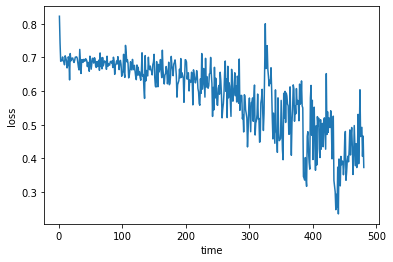

In [34]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net_Orignal' + str(epoch) + '.pth'
    torch.save(Net_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

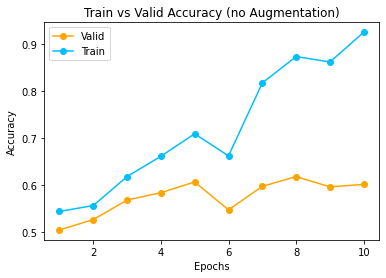

In [35]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m1 = test_accu
train_accu_orignal_m1 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

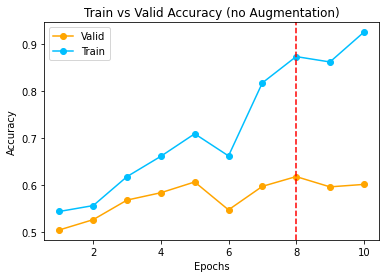

In [36]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m1.index(max(test_accu_orignal_m1))+1, color='r', linestyle='--')
plt.show()

In [37]:
print(f'Train accuracy iteration: {train_accu_orignal_m1}')
print(f'Test accuracy iteration: {test_accu_orignal_m1}')

Train accuracy iteration: [0.5434895833333333, 0.5559895833333334, 0.6177083333333333, 0.6609375, 0.7088541666666667, 0.66171875, 0.8171875, 0.8731770833333333, 0.86171875, 0.925]
Test accuracy iteration: [0.5041666666666667, 0.5260416666666666, 0.5677083333333334, 0.5833333333333334, 0.60625, 0.546875, 0.596875, 0.6177083333333333, 0.5958333333333333, 0.6010416666666667]


# Model 2

In [7]:
import torch.nn.functional as F 
import torch.optim as optim

class Net2(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, kernel_size= 3)
      self.pool1 = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(16, 32, kernel_size = 3)
      self.conv3 = nn.Conv2d(32, 32, kernel_size = 3)
      self.pool3 = nn.MaxPool2d(3, 3)
      self.norm = nn.BatchNorm2d(32)
      self.dropout1 = nn.Dropout2d(0.2)
      self.dropout2 = nn.Dropout(0.25)
      self.fc1 = nn.Linear(32*41*41, 1024) 
      self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
      x = self.pool1(F.relu(self.conv1(x)))
      x = F.relu(self.conv2(x))
      x = self.norm(x)
      x = self.pool3(F.relu(self.conv3(x)))
      x = self.dropout1(x)
      x = x.view(-1, 32*41*41)
      x = F.relu(self.fc1(x))
      x = self.dropout2(x)
      x = self.fc2(x)
      return x

## Flip

In [ ]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Flip = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Flip.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.012)

0 10 0.817724472284317
0 20 0.7815330803394318
0 30 0.9135767042636871
0 40 0.7420848965644836
0 50 0.7372451484203338
0 60 0.6974715322256089
0 70 0.6977786064147949
0 80 0.6864441514015198
0 90 0.7137364685535431
0 100 0.7063267648220062
0 110 0.6820198476314545
0 120 0.7020930230617524
0 130 0.6933234632015228
0 140 0.6963126122951507
0 150 0.6881809115409852
0 160 0.6705526739358902
0 170 0.6965387642383576
0 180 0.6937416553497314
0 190 0.6909800231456756
0 200 0.7154834508895874
0 210 0.6971846282482147
0 220 0.6871433973312377
0 230 0.7053796589374542
0 240 0.6942277133464814
0 250 0.6915707409381866
0 260 0.6777299463748931
0 270 0.7088535904884339
0 280 0.6941645741462708
0 290 0.6916625916957855
0 300 0.692057752609253
0 310 0.7000425219535827
0 320 0.6587611019611359
0 330 0.7240450739860534
0 340 0.6936951577663422
0 350 0.6984859943389893
0 360 0.7018073558807373
0 370 0.6856168508529663
0 380 0.6712812423706055
0 390 0.6523639738559723
0 400 0.69625403881073
0 410 0.69205

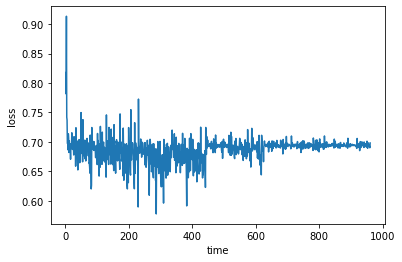

In [40]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Flip' + str(epoch) + '.pth'
    torch.save(Net2_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

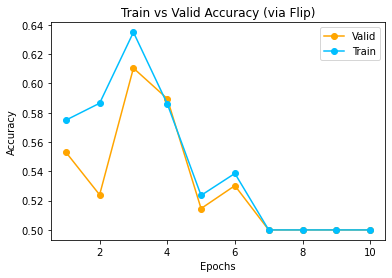

In [41]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m2 = test_accu
train_accu_flip_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

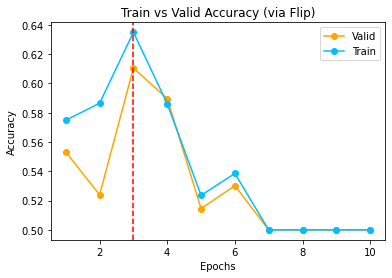

In [42]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m2.index(max(test_accu_flip_m2))+1, color='r', linestyle='--')
plt.show()

In [43]:
print(f'Train accuracy iteration: {train_accu_flip_m2}')
print(f'Test accuracy iteration: {test_accu_flip_m2}')

Train accuracy iteration: [0.5748697916666666, 0.5864583333333333, 0.6348958333333333, 0.5860677083333333, 0.5235677083333333, 0.5385416666666667, 0.5, 0.5, 0.5, 0.5]
Test accuracy iteration: [0.553125, 0.5239583333333333, 0.6104166666666667, 0.5895833333333333, 0.5145833333333333, 0.5302083333333333, 0.5, 0.5, 0.5, 0.5]


## Rotate

In [44]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Rotate = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 0.8772774457931518
0 20 0.7953245580196381
0 30 0.9175656497478485
0 40 0.7176073610782623
0 50 0.7251058489084243
0 60 0.7296521723270416
0 70 0.6908687114715576
0 80 0.6889258563518524
0 90 0.706543630361557
0 100 0.6911533117294312
0 110 0.7095342516899109
0 120 0.7374376833438874
0 130 0.6840272605419159
0 140 0.7090824484825134
0 150 0.694294148683548
0 160 0.681739991903305
0 170 0.7134738326072693
0 180 0.6974481761455535
0 190 0.707415759563446
0 200 0.6878824949264526
0 210 0.685212928056717
0 220 0.6523421823978424
0 230 0.7243420243263244
0 240 0.687937593460083
0 250 0.6840496599674225
0 260 0.6947060108184815
0 270 0.7004728317260742
0 280 0.6540166318416596
0 290 0.7809226155281067
0 300 0.6978820741176606
0 310 0.6993197083473206
0 320 0.6837332546710968
0 330 0.7161441266536712
0 340 0.7140477955341339
0 350 0.7090870499610901
0 360 0.6924200534820557
0 370 0.6671883821487427
0 380 0.7587629437446595
0 390 0.6949479937553406
0 400 0.6875791847705841
0 410 0.7120361

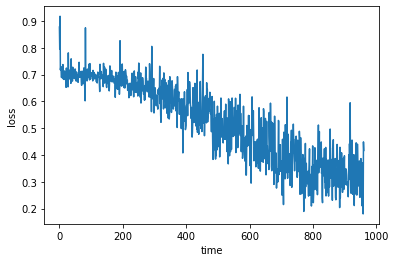

In [45]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Rotate' + str(epoch) + '.pth'
    torch.save(Net2_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

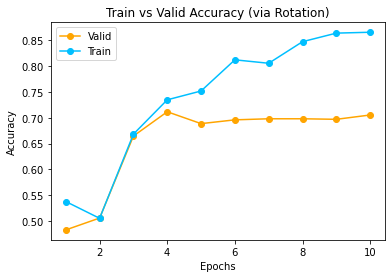

In [46]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m2 = test_accu
train_accu_rotate_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

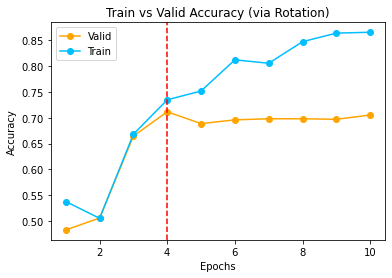

In [47]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m2.index(max(test_accu_rotate_m2))+1, color='r', linestyle='--')
plt.show()

In [48]:
print(f'Train accuracy iteration: {train_accu_rotate_m2}')
print(f'Test accuracy iteration: {test_accu_rotate_m2}')

Train accuracy iteration: [0.5381510416666667, 0.5057291666666667, 0.6682291666666667, 0.7345052083333333, 0.7515625, 0.81171875, 0.805078125, 0.8467447916666667, 0.86328125, 0.8649739583333333]
Test accuracy iteration: [0.48333333333333334, 0.50625, 0.6645833333333333, 0.7114583333333333, 0.6885416666666667, 0.6958333333333333, 0.6979166666666666, 0.6979166666666666, 0.696875, 0.7052083333333333]


## Crop

In [49]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Crop = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 0.8806510388851165
0 20 0.8658908545970917
0 30 0.900346964597702
0 40 0.7841036975383758
0 50 0.7299674570560455
0 60 0.7645791888236999
0 70 0.7070837497711182
0 80 0.6991117715835571
0 90 0.717292058467865
0 100 0.6982263624668121
0 110 0.6895844757556915
0 120 0.700001984834671
0 130 0.7081622779369354
0 140 0.7155380368232727
0 150 0.6902988970279693
0 160 0.6798836886882782
0 170 0.7038807034492492
0 180 0.6895255088806153
0 190 0.7058184325695038
0 200 0.7079560935497284
0 210 0.7011595726013183
0 220 0.6769408047199249
0 230 0.7241940379142762
0 240 0.6972783029079437
0 250 0.6869623482227325
0 260 0.7100800931453705
0 270 0.7108204245567322
0 280 0.7144108653068543
0 290 0.6875822126865387
0 300 0.7031276822090149
0 310 0.6859870970249176
0 320 0.7143264949321747
0 330 0.6906367659568786
0 340 0.6941787660121918
0 350 0.6955767750740052
0 360 0.7137476682662964
0 370 0.707755160331726
0 380 0.6785941302776337
0 390 0.7080146491527557
0 400 0.6826509714126587
0 410 0.70860

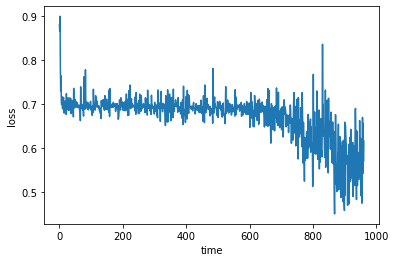

In [50]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Crop' + str(epoch) + '.pth'
    torch.save(Net2_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

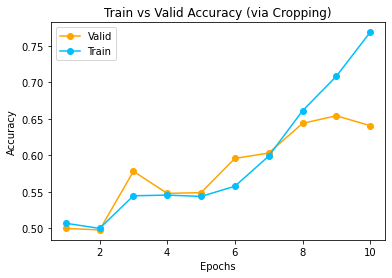

In [51]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m2 = test_accu
train_accu_crop_m2= train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

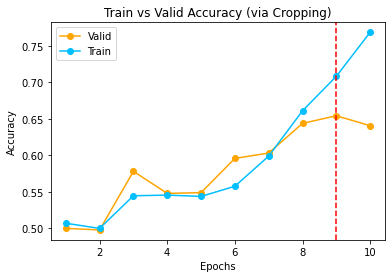

In [52]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m2.index(max(test_accu_crop_m2))+1, color='r', linestyle='--')
plt.show()

In [53]:
print(f'Train accuracy iteration: {train_accu_crop_m2}')
print(f'Test accuracy iteration: {test_accu_crop_m2}')

Train accuracy iteration: [0.50703125, 0.5, 0.5446614583333333, 0.5455729166666666, 0.54375, 0.5576822916666667, 0.5989583333333334, 0.6609375, 0.708203125, 0.7684895833333333]
Test accuracy iteration: [0.5, 0.4979166666666667, 0.578125, 0.5479166666666667, 0.5489583333333333, 0.5958333333333333, 0.603125, 0.64375, 0.6541666666666667, 0.640625]


## Color

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Color = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Color.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.017)

0 10 0.8651658177375794
0 20 0.8710060894489289
0 30 0.8858837068080903
0 40 0.7304496049880982
0 50 0.7085990905761719
0 60 0.6953622817993164
0 70 0.7068765461444855
0 80 0.6977583885192871
0 90 0.6846597015857696
0 100 0.6939556062221527
0 110 0.6999585270881653
0 120 0.7028264582157135
0 130 0.6990409731864929
0 140 0.6970461845397949
0 150 0.6966849029064178
0 160 0.6879082918167114
0 170 0.7049087226390839
0 180 0.6991688549518585
0 190 0.7043310344219208
0 200 0.697166359424591
0 210 0.6928884506225585
0 220 0.669887763261795
0 230 0.7302458345890045
0 240 0.6882579028606415
0 250 0.6871567070484161
0 260 0.7047106444835662
0 270 0.7001471221446991
0 280 0.6572017431259155
0 290 0.731693959236145
0 300 0.6883303701877594
0 310 0.7005042612552643
0 320 0.6992957532405853
0 330 0.6968217015266418
0 340 0.699142438173294
0 350 0.7165756106376648
0 360 0.6961396157741546
0 370 0.6916553318500519
0 380 0.7039200603961945
0 390 0.6933578133583069
0 400 0.6886696636676788
0 410 0.69082

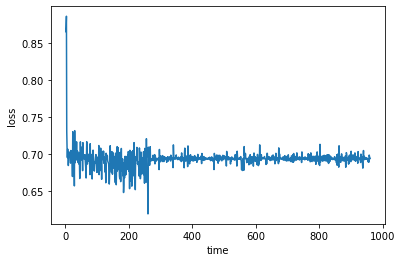

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Color' + str(epoch) + '.pth'
    torch.save(Net2_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

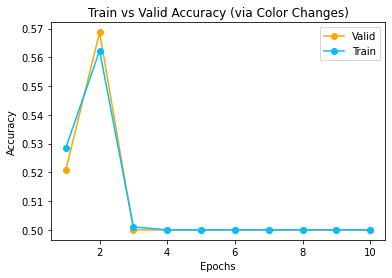

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m2 = test_accu
train_accu_color_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

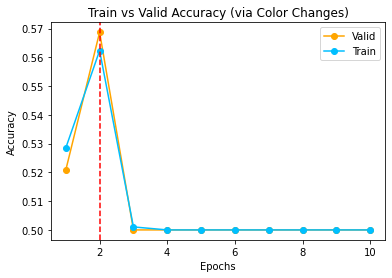

In [11]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m2.index(max(test_accu_color_m2))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_color_m2}')
print(f'Test accuracy iteration: {test_accu_color_m2}')

Train accuracy iteration: [0.528515625, 0.5623697916666667, 0.5010416666666667, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Test accuracy iteration: [0.5208333333333334, 0.56875, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


## Blur

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Blur = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Blur.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.011)

0 10 0.8045450031757355
0 20 0.8161853432655335
0 30 0.8654665946960449
0 40 0.7057295560836792
0 50 0.7096885442733765
0 60 0.6949662774801254
0 70 0.7073927164077759
0 80 0.6940723598003388
0 90 0.7014701068401337
0 100 0.7018143475055695
0 110 0.6875044286251069
0 120 0.7100980758666993
0 130 0.6853999853134155
0 140 0.7014012813568116
0 150 0.6751318991184234
0 160 0.6511547803878784
0 170 0.7248586595058442
0 180 0.6901434242725373
0 190 0.6931953489780426
0 200 0.7090681314468383
0 210 0.6940869331359864
0 220 0.6838821828365326
0 230 0.7205710113048553
0 240 0.6966659963130951
0 250 0.6952664315700531
0 260 0.699543046951294
0 270 0.7032733261585236
0 280 0.6918615162372589
0 290 0.6981025636196136
0 300 0.6851002991199493
0 310 0.7013103008270264
0 320 0.6836847841739655
0 330 0.7214220583438873
0 340 0.7064301550388337
0 350 0.6944095075130463
0 360 0.696922892332077
0 370 0.6732727408409118
0 380 0.7117703080177307
0 390 0.681389319896698
0 400 0.6874777674674988
0 410 0.6889

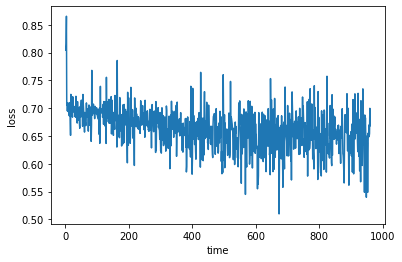

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Blur' + str(epoch) + '.pth'
    torch.save(Net2_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

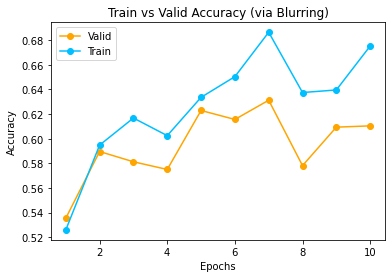

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m2 = test_accu
train_accu_blur_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

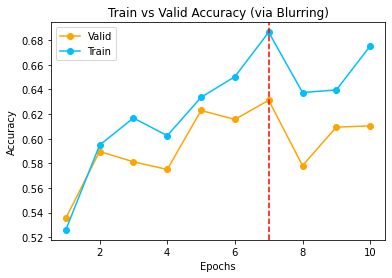

In [11]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m2.index(max(test_accu_blur_m2))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_blur_m2}')
print(f'Test accuracy iteration: {test_accu_blur_m2}')

Train accuracy iteration: [0.5259114583333333, 0.5947916666666667, 0.616796875, 0.6024739583333333, 0.63359375, 0.650390625, 0.6864583333333333, 0.6375, 0.6395833333333333, 0.6752604166666667]
Test accuracy iteration: [0.5354166666666667, 0.5895833333333333, 0.58125, 0.575, 0.6229166666666667, 0.615625, 0.63125, 0.578125, 0.609375, 0.6104166666666667]


## Orignal

In [15]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Orignal = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Orignal.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.008)

0 10 0.9585796594619751
0 20 0.8952730476856232
0 30 0.7456216394901276
0 40 0.6960245847702027
0 50 0.691734129190445
0 60 0.7133245646953583
0 70 0.6901172161102295
0 80 0.7262642502784729
0 90 0.6788226902484894
0 100 0.6945294201374054
0 110 0.6561493337154388
0 120 0.6766006410121918
0 130 0.7096913039684296
0 140 0.7204201459884644
0 150 0.6966545760631562
0 160 0.692358273267746
0 170 0.6671464443206787
0 180 0.7420640230178833
0 190 0.6993633866310119
0 200 0.682795375585556
0 210 0.708428007364273
0 220 0.6887228846549988
0 230 0.7219263970851898
0 240 0.6954141855239868
0 250 0.69728022813797
0 260 0.6902577221393585
0 270 0.6950453877449035
0 280 0.6909674048423767
0 290 0.6912857234477997
0 300 0.6697084963321686
0 310 0.7053106725215912
0 320 0.6814899623394013
0 330 0.6796830117702484
0 340 0.7019950985908509
0 350 0.708803790807724
0 360 0.6799932956695557
0 370 0.6925976932048797
0 380 0.7043948352336884
0 390 0.671165668964386
0 400 0.6690488994121552
0 410 0.674575895

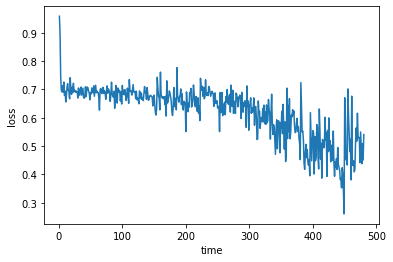

In [16]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Orignal' + str(epoch) + '.pth'
    torch.save(Net2_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

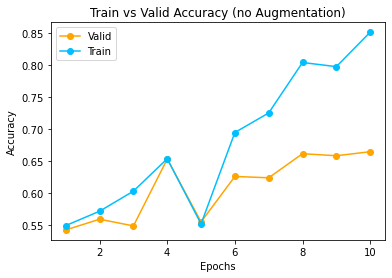

In [17]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m2 = test_accu
train_accu_orignal_m2 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

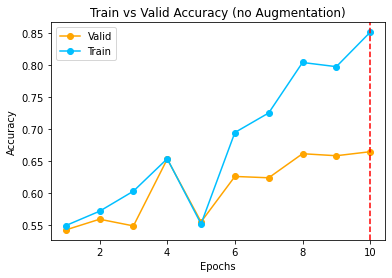

In [18]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m2.index(max(test_accu_orignal_m2))+1, color='r', linestyle='--')
plt.show()

In [19]:
print(f'Train accuracy iteration: {train_accu_orignal_m2}')
print(f'Test accuracy iteration: {test_accu_orignal_m2}')

Train accuracy iteration: [0.5494791666666666, 0.571875, 0.603125, 0.6536458333333334, 0.5520833333333334, 0.69453125, 0.725, 0.8036458333333333, 0.7971354166666667, 0.85078125]
Test accuracy iteration: [0.5427083333333333, 0.559375, 0.5489583333333333, 0.653125, 0.5552083333333333, 0.6260416666666667, 0.6239583333333333, 0.6614583333333334, 0.6583333333333333, 0.6645833333333333]


# Model 3

In [7]:
import torch.nn.functional as F 
import torch.optim as optim
from typing import Callable, Any, Optional, Tuple, List
from torch import nn, Tensor

class Net3(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1a = BasicConv2d(3, 32, kernel_size = 3, stride = 2)
      self.conv2a = BasicConv2d(32, 32, kernel_size = 3)
      self.conv2b = BasicConv2d(32, 64, kernel_size = 3, padding = 1)
      self.pool3 = nn.MaxPool2d(kernel_size = 3, stride = 2)
      self.mixed4 = InceptionA(64, pool_features = 32)
      self.dropout1 = nn.Dropout2d(0.5)
      self.dropout2 = nn.Dropout(0.5)
      self.fc1 = nn.Linear(62*62*144, 1024) 
      self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
      # 256 x 256 x 3
      x = self.conv1a(x)
      # 127 x 127 x 32
      x = self.conv2a(x)
      # 125 x 125 x 32
      x = self.conv2b(x)
      # 125 x 125 x 64
      x = self.pool3(x)
      # 62 x 62 x 64
      x = self.mixed4(x)
      # 62 x 62 x 144
      x = self.dropout1(x)
      x = x.view(-1, 62*62*144)
      # 144
      x = F.relu(self.fc1(x))
      x = self.dropout2(x)
      x = self.fc2(x)
      return x

class InceptionA(nn.Module):
    def __init__(
        self, in_channels: int, pool_features: int, conv_block: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super().__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.branch1x1 = conv_block(in_channels, 32, kernel_size=1)

        self.branch5x5_1 = conv_block(in_channels, 24, kernel_size=1)
        self.branch5x5_2 = conv_block(24, 32, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = conv_block(in_channels, 32, kernel_size=1)
        self.branch3x3dbl_2 = conv_block(32, 48, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = conv_block(48, 48, kernel_size=3, padding=1)

        self.branch_pool = conv_block(in_channels, pool_features, kernel_size=1)

    def _forward(self, x: Tensor) -> List[Tensor]:
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return outputs

    def forward(self, x: Tensor) -> Tensor:
        outputs = self._forward(x)
        return torch.cat(outputs, 1)

class BasicConv2d(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, **kwargs: Any) -> None:
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x: Tensor) -> Tensor:
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

## Flip

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Flip = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Flip.parameters(), lr=0.001, momentum=0.8)

0 10 1.2884515702724457
0 20 4.576166570186615
0 30 4.5242599725723265
0 40 1.5168449729681015
0 50 1.1864257901906967
0 60 0.8044090539216995
0 70 0.8480150312185287
0 80 0.823110044002533
0 90 0.6185448229312897
0 100 0.7429006516933441
0 110 0.7182848632335663
0 120 0.7183419406414032
0 130 0.6798401057720185
0 140 0.6949038922786712
0 150 0.7373891532421112
0 160 0.7048933207988739
0 170 0.6968321740627289
0 180 0.7430784672498703
0 190 0.6587893009185791
0 200 0.7411591410636902
0 210 0.6859764933586121
0 220 0.7056373834609986
0 230 0.6998067498207092
0 240 0.669217586517334
0 250 0.7406555056571961
0 260 0.6777540445327759
0 270 0.6413925647735595
0 280 0.6906703859567642
0 290 0.6710726976394653
0 300 0.706276935338974
0 310 0.7296302139759063
0 320 0.678363436460495
0 330 0.7120791077613831
0 340 0.7209275722503662
0 350 0.7413148164749146
0 360 0.658688884973526
0 370 0.644660222530365
0 380 0.7498353123664856
0 390 0.7161530792713166
0 400 0.6970424234867096
0 410 0.68637307

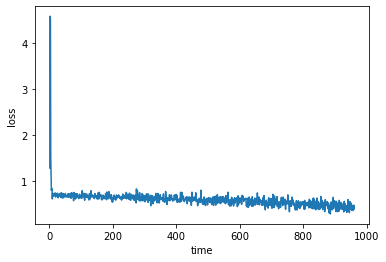

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net3_Flip' + str(epoch) + '.pth'
    torch.save(Net3_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

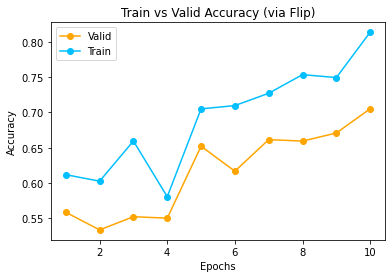

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m3 = test_accu
train_accu_flip_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

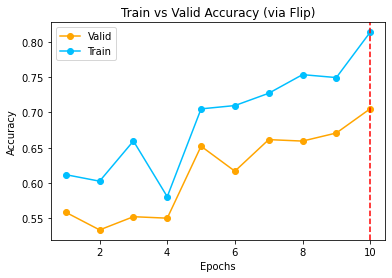

In [11]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m3.index(max(test_accu_flip_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_flip_m3}')
print(f'Test accuracy iteration: {test_accu_flip_m3}')

Train accuracy iteration: [0.61171875, 0.6024739583333333, 0.6595052083333334, 0.58046875, 0.705078125, 0.709765625, 0.7272135416666666, 0.7536458333333333, 0.7494791666666667, 0.8138020833333334]
Test accuracy iteration: [0.5583333333333333, 0.5333333333333333, 0.5520833333333334, 0.55, 0.6520833333333333, 0.6166666666666667, 0.6614583333333334, 0.659375, 0.6708333333333333, 0.7052083333333333]


## Rotate

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Rotate = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Rotate.parameters(), lr=0.001, momentum=0.8)

0 10 1.3639406204223632
0 20 3.2760019302368164
0 30 1.8271578669548034
0 40 1.519826477766037
0 50 0.9802502363920211
0 60 0.8062585890293121
0 70 0.6647945165634155
0 80 0.7517420053482056
0 90 0.6232553750276566
0 100 0.7197909951210022
0 110 0.7133112728595734
0 120 0.6993030369281769
0 130 0.6947161257266998
0 140 0.6717241883277894
0 150 0.6463227897882462
0 160 0.7225913584232331
0 170 0.692801547050476
0 180 0.7393647611141205
0 190 0.6340466976165772
0 200 0.7873109400272369
0 210 0.6748431146144866
0 220 0.7347266018390656
0 230 0.721044385433197
0 240 0.6354508697986603
0 250 0.7432014286518097
0 260 0.6939077198505401
0 270 0.642644727230072
0 280 0.6941538274288177
0 290 0.6902682602405548
0 300 0.6892009019851685
0 310 0.7172900378704071
0 320 0.6906704008579254
0 330 0.684169328212738
0 340 0.7079019188880921
0 350 0.6754704475402832
0 360 0.679250854253769
0 370 0.6390271604061126
0 380 0.6882514894008637
0 390 0.6867564141750335
0 400 0.787916624546051
0 410 0.68562226

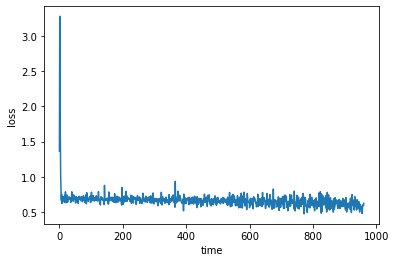

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net3_Rotate' + str(epoch) + '.pth'
    torch.save(Net3_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

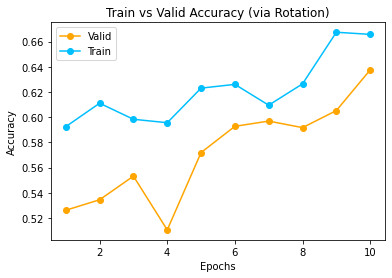

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m3 = test_accu
train_accu_rotate_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

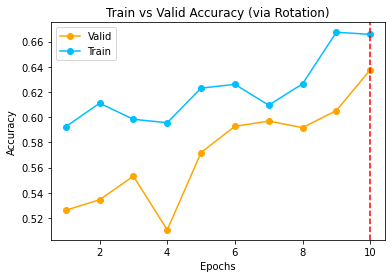

In [11]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m3.index(max(test_accu_rotate_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_rotate_m3}')
print(f'Test accuracy iteration: {test_accu_rotate_m3}')

Train accuracy iteration: [0.5924479166666666, 0.6110677083333333, 0.5983072916666666, 0.5955729166666667, 0.623046875, 0.6260416666666667, 0.6095052083333333, 0.6264322916666667, 0.6674479166666667, 0.6657552083333333]
Test accuracy iteration: [0.5260416666666666, 0.534375, 0.553125, 0.5104166666666666, 0.571875, 0.5927083333333333, 0.596875, 0.5916666666666667, 0.6052083333333333, 0.6375]


## Crop

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Crop = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Crop.parameters(), lr=0.001, momentum=0.8)

0 10 1.7047699689865112
0 20 3.4471559166908263
0 30 2.0423330456018447
0 40 2.369533208012581
0 50 1.223571130633354
0 60 1.1238558411598205
0 70 0.8056473314762116
0 80 0.7606221437454224
0 90 0.6824177503585815
0 100 0.725923752784729
0 110 0.7221815645694732
0 120 0.7368388712406159
0 130 0.7818477749824524
0 140 0.7287908017635345
0 150 0.7264830052852631
0 160 0.7084042429924011
0 170 0.7192903995513916
0 180 0.7216698050498962
0 190 0.6636884868144989
0 200 0.7714743912220001
0 210 0.7254199266433716
0 220 0.7213795900344848
0 230 0.6967536807060242
0 240 0.7069368720054626
0 250 0.7029356598854065
0 260 0.7053317546844482
0 270 0.6869159162044525
0 280 0.6840108394622803
0 290 0.736314982175827
0 300 0.6644766867160797
0 310 0.7405211806297303
0 320 0.7049865126609802
0 330 0.7080272793769836
0 340 0.6976756155490875
0 350 0.6748173296451568
0 360 0.6844402194023133
0 370 0.7117439806461334
0 380 0.6991521298885346
0 390 0.7102661728858948
0 400 0.6916286230087281
0 410 0.67835

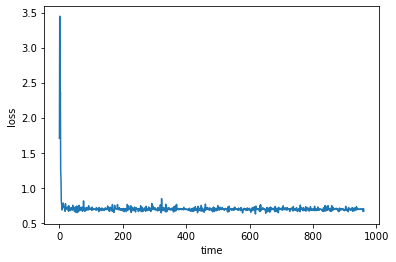

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net3_Crop' + str(epoch) + '.pth'
    torch.save(Net3_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

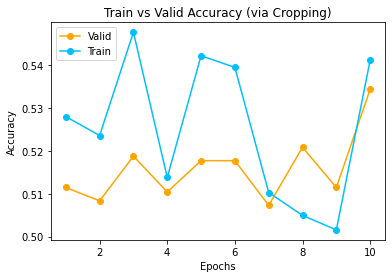

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m3 = test_accu
train_accu_crop_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

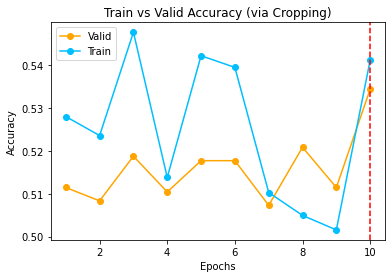

In [11]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m3.index(max(test_accu_crop_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_crop_m3}')
print(f'Test accuracy iteration: {test_accu_crop_m3}')

Train accuracy iteration: [0.5279947916666666, 0.5235677083333333, 0.54765625, 0.5138020833333333, 0.5421875, 0.539453125, 0.5102864583333333, 0.5049479166666667, 0.5015625, 0.5411458333333333]
Test accuracy iteration: [0.5114583333333333, 0.5083333333333333, 0.51875, 0.5104166666666666, 0.5177083333333333, 0.5177083333333333, 0.5072916666666667, 0.5208333333333334, 0.5114583333333333, 0.534375]


## Color

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Color = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Color.parameters(), lr=0.001, momentum=0.8)

0 10 1.5323916375637054
0 20 3.9738753199577332
0 30 2.433328664302826
0 40 1.368445485830307
0 50 0.6972403407096863
0 60 0.8321451425552369
0 70 0.7528757929801941
0 80 0.8160020232200622
0 90 0.6731107532978058
0 100 0.7460096836090088
0 110 0.7552020132541657
0 120 0.7320849478244782
0 130 0.6956432878971099
0 140 0.6789809882640838
0 150 0.7595005750656127
0 160 0.6879010915756225
0 170 0.7102217376232147
0 180 0.735102528333664
0 190 0.6810754895210266
0 200 0.7233869075775147
0 210 0.6863554179668426
0 220 0.695914500951767
0 230 0.6823680758476257
0 240 0.6602473616600036
0 250 0.7181138396263123
0 260 0.6954113006591797
0 270 0.7092822194099426
0 280 0.6829467833042144
0 290 0.7099430382251739
0 300 0.674959397315979
0 310 0.713899427652359
0 320 0.6682101547718048
0 330 0.6934970319271088
0 340 0.7146562039852142
0 350 0.6895473539829254
0 360 0.7333989202976227
0 370 0.6989698231220245
0 380 0.7054251492023468
0 390 0.7351213276386261
0 400 0.7050667822360992
0 410 0.6790170

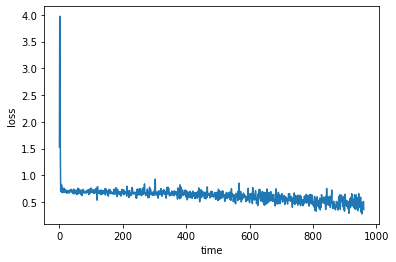

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net3_Color' + str(epoch) + '.pth'
    torch.save(Net3_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

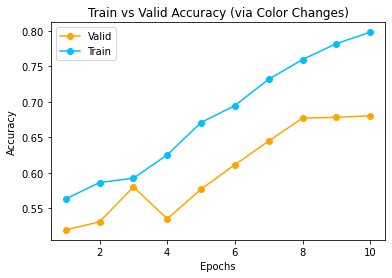

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m3 = test_accu
train_accu_color_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

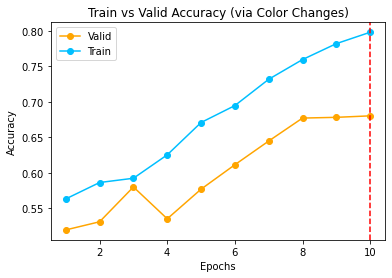

In [11]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m3.index(max(test_accu_color_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_color_m3}')
print(f'Test accuracy iteration: {test_accu_color_m3}')

Train accuracy iteration: [0.5634114583333333, 0.5864583333333333, 0.5924479166666666, 0.625390625, 0.6708333333333333, 0.6946614583333334, 0.731640625, 0.759375, 0.7817708333333333, 0.7977864583333333]
Test accuracy iteration: [0.5197916666666667, 0.53125, 0.5802083333333333, 0.5354166666666667, 0.5770833333333333, 0.6114583333333333, 0.6447916666666667, 0.6770833333333334, 0.678125, 0.6802083333333333]


## Blur

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Blur = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Blur.parameters(), lr=0.001, momentum=0.8)

0 10 1.4484321177005768
0 20 4.977591204643249
0 30 3.093819206953049
0 40 1.0370757162570954
0 50 0.7792104244232178
0 60 0.712401831150055
0 70 0.7921962440013885
0 80 0.8342366337776184
0 90 0.7440816521644592
0 100 0.7498741567134857
0 110 0.7891869246959686
0 120 0.7141438245773315
0 130 0.7362383127212524
0 140 0.6680076003074646
0 150 0.6588059335947036
0 160 0.6982900917530059
0 170 0.748071300983429
0 180 0.745519271492958
0 190 0.6839438259601593
0 200 0.7186647832393647
0 210 0.6689332246780395
0 220 0.7024793446063995
0 230 0.8176248967647552
0 240 0.6659300208091736
0 250 0.7115830898284912
0 260 0.6793643653392791
0 270 0.650271201133728
0 280 0.6434200555086136
0 290 0.7015679240226745
0 300 0.7126411259174347
0 310 0.7592231929302216
0 320 0.6965309262275696
0 330 0.6650026381015778
0 340 0.7398322522640228
0 350 0.6750973582267761
0 360 0.6765487194061279
0 370 0.6560770869255066
0 380 0.6656946480274201
0 390 0.7809770405292511
0 400 0.7102495014667511
0 410 0.7199199

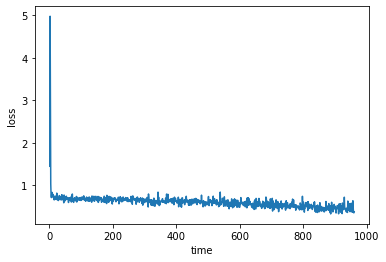

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net3_Blur' + str(epoch) + '.pth'
    torch.save(Net3_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

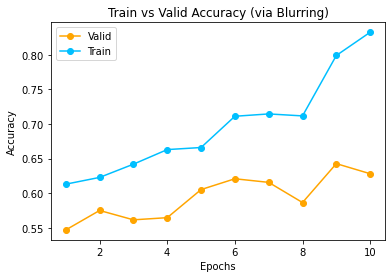

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m3 = test_accu
train_accu_blur_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

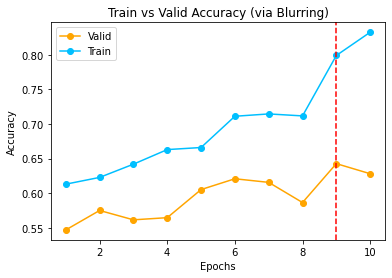

In [11]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m3.index(max(test_accu_blur_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_blur_m3}')
print(f'Test accuracy iteration: {test_accu_blur_m3}')

Train accuracy iteration: [0.6130208333333333, 0.6227864583333333, 0.6419270833333334, 0.6630208333333333, 0.666015625, 0.7111979166666667, 0.7145833333333333, 0.71171875, 0.7990885416666667, 0.8326822916666666]
Test accuracy iteration: [0.546875, 0.575, 0.5614583333333333, 0.5645833333333333, 0.6052083333333333, 0.6208333333333333, 0.615625, 0.5864583333333333, 0.6427083333333333, 0.628125]


## Orignal

In [8]:
# set seed
torch.manual_seed(1)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Orignal = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Orignal.parameters(), lr=0.001, momentum=0.8)

0 10 2.070086920261383
0 20 3.290882083773613
0 30 1.9142036080360412
0 40 0.7668013960123062
0 50 0.8177580773830414
0 60 0.8627571046352387
0 70 0.7853030622005462
0 80 0.791212284564972
0 90 0.7264499962329865
0 100 0.7001508295536041
0 110 0.748021525144577
0 120 0.7004111766815185
0 130 0.6955584466457367
0 140 0.6994925677776337
0 150 0.7010775327682495
0 160 0.6619390368461608
0 170 0.6709835171699524
0 180 0.7233862817287445
0 190 0.6706780552864074
0 200 0.7018877923488617
0 210 0.6856528460979462
0 220 0.715529465675354
0 230 0.6955639123916626
0 240 0.6790025770664215
0 250 0.7069225549697876
0 260 0.7140420258045197
0 270 0.704997456073761
0 280 0.7182475864887238
0 290 0.6621332168579102
0 300 0.6432599902153016
0 310 0.6997993409633636
0 320 0.6435337662696838
0 330 0.6906820654869079
0 340 0.7545557260513306
0 350 0.671936172246933
0 360 0.7394042313098907
0 370 0.6099136054515839
0 380 0.8977793991565705
0 390 0.659868311882019
0 400 0.6650411367416382
0 410 0.663984152

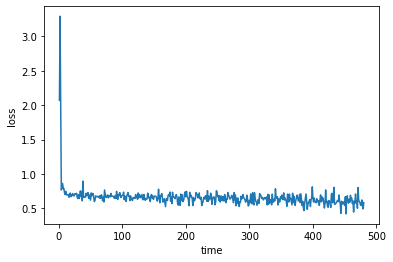

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net3_Orignal' + str(epoch) + '.pth'
    torch.save(Net3_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

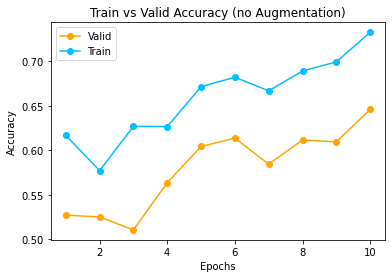

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m3 = test_accu
train_accu_orignal_m3 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

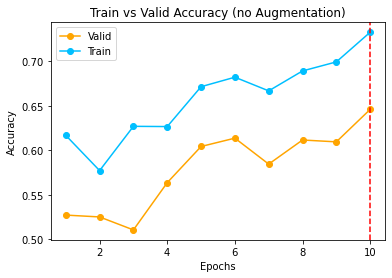

In [11]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m3.index(max(test_accu_orignal_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_orignal_m3}')
print(f'Test accuracy iteration: {test_accu_orignal_m3}')

Train accuracy iteration: [0.6166666666666667, 0.5770833333333333, 0.6268229166666667, 0.6265625, 0.6713541666666667, 0.68203125, 0.6666666666666666, 0.6890625, 0.69921875, 0.7325520833333333]
Test accuracy iteration: [0.5270833333333333, 0.525, 0.5104166666666666, 0.5635416666666667, 0.6041666666666666, 0.6135416666666667, 0.584375, 0.6114583333333333, 0.609375, 0.6458333333333334]
